<a href="https://colab.research.google.com/github/imharshmishra87/Feature-Scaling-Ml/blob/main/random_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dealing Wiht Numerical Data

In [74]:
import numpy as np
import pandas as pd


In [76]:
df=pd.read_csv('/content/Titanic-Dataset.csv',usecols=['Survived','Age','Fare'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [77]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [79]:
df['Age'][df['Age'].isnull()]

,Age
5,NaN
17,NaN
19,NaN
26,NaN
28,NaN
...,...
859,NaN
863,NaN
868,NaN
878,NaN


## Train, Test and Splitting Of The Data

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'])

In [83]:
X_train['age_imputed']=X_train['Age']
X_test['age_imputed']=X_test['Age']

## Filling The Data With Random Value

In [84]:
X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['age_imputed'].isnull().sum()).values
X_test['age_imputed'][X_test['age_imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['age_imputed'].isnull().sum()).values


/tmp/ipython-input-235110884.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['age_imputed'].isnull().sum()).values
/tmp/ipython-input-23511088

## Graph Analysis Before And After Imputation

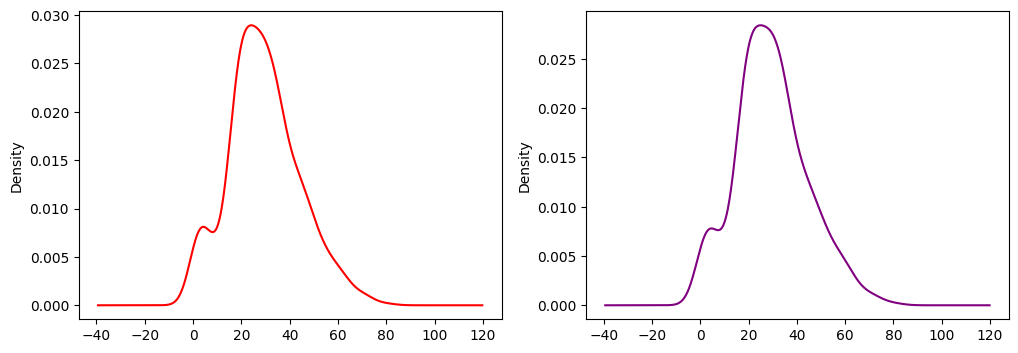

In [85]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,4))
ax=plt.subplot(121)
X_train['age_imputed'].plot(kind='kde',color='red',ax=ax)

ax2=plt.subplot(122)
X_train['Age'].plot(kind='kde',color='purple',ax=ax2)
plt.show()



In [86]:
X_train[['Age','age_imputed',]].var()

,0
Age,219.900504
age_imputed,215.698938


In [87]:
X_train[['Age','age_imputed','Fare']].corr()

,Age,age_imputed,Fare
Age,1.000000,1.000000,0.093653
age_imputed,1.000000,1.000000,0.094758
Fare,0.093653,0.094758,1.000000


In [ ]:
X_train[['Age','age_imputed','Fare']].cov()

,Age,age_imputed,Fare
Age,202.250459,202.250459,105.934805
age_imputed,202.250459,199.231981,77.718767
Fare,105.934805,77.718767,2613.031847


<Axes: >

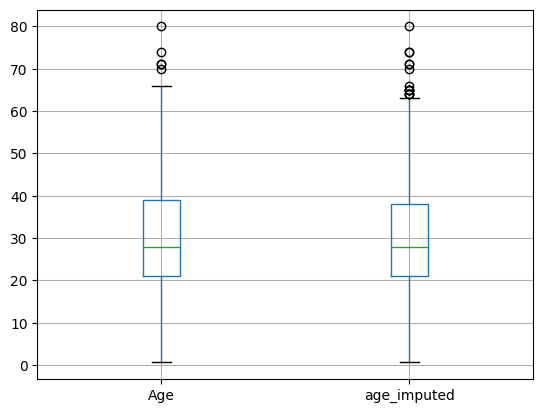

In [ ]:
X_train[['Age','age_imputed']].boxplot()

In [ ]:
observation=X_train.sample(1).iloc[0]
sampled_vale=X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

# Categorical Data Set

In [7]:
data=pd.read_csv("/content/housing_dataset.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


## Train, Test and Splitting Of the Data

In [9]:
X=data
y=data['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

## Creating Two Additional Columns To View changes

In [12]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

## Randmly generating the values for fireplaceQu and GarageQual


In [31]:
# Randmly generating the values for fireplaceQu

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values


X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values


/tmp/ipython-input-3162020664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values
/tmp/ipython-input-3162020664.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[

In [39]:
data_val=pd.concat([X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
                    X_train['FireplaceQu_imputed'].value_counts()/len(data)],axis=1)
data_val.columns=['Before','imputed']

data_val2=pd.concat([X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
                     X_train['GarageQual_imputed'].value_counts()/len(data)],axis=1)
data_val2.columns=['Before','After Imputation']

In [40]:
data_val

,Before,imputed
Gd,0.501613,0.399315
TA,0.398387,0.320548
Fa,0.043548,0.036301
Ex,0.032258,0.025342
Po,0.024194,0.018493


In [41]:
data_val2

,Before,After Imputation
TA,0.947606,0.758219
Fa,0.036134,0.028082
Gd,0.011743,0.010274
Po,0.002710,0.002055
Ex,0.001807,0.001370


## Analysing The Graph(Before and After Imputation)

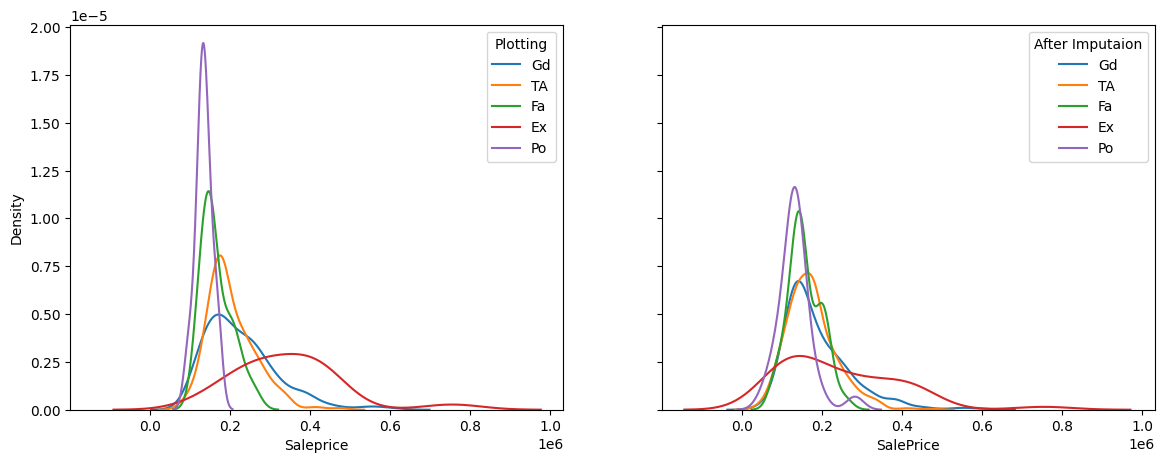

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2)=plt.subplots(1,2,figsize=(14,5),sharex=True,sharey=True)
for cats in X_train['FireplaceQu'].dropna().unique():
  sns.kdeplot(X_train[X_train['FireplaceQu']==cats]['SalePrice'],label=cats,ax=ax1)
ax1.legend(title='Plotting')
ax1.set_xlabel('Saleprice')



for cats in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.kdeplot(X_train[X_train['FireplaceQu_imputed']==cats]['SalePrice'],label=cats,ax=ax2)
ax2.legend(title='After Imputaion')

plt.show()